In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [5]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [7]:
df.shape

(15, 2)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Chirps/Second,15.0,16.566667,1.712837,14.4,15.45,16.0,17.15,20.0
Ground Temperature,15.0,79.346667,7.020467,69.4,73.40,80.6,83.40,93.3


CHECK THE PRESENCE OF OUTLIERS

In [ ]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# x = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

# # df[x.isin([True])] 
# substring = 'True'
# y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
# y

In [10]:
def outlierpresence(df):
  for i in df.keys():
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    x = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
    # df[x.isin([True])]
    substring = 'True'
    y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)] #IT WILL GIVE ALL OUTLIERS IN THE DATAFRAME WITH ALL COLUMNS
    if True in y[i].tolist(): #HERE WE CHECK True is in the list of particular column
      print('Outliers are', '\033[1m'+ 'present' +'\033[0m', 'in the data of','\033[1m' + i + '\033[0m')
      print('-------------------------------')
    else:
      print('Outliers are', '\033[1m'+ ' not present in the data of' +'\033[0m', 'in','\033[1m' + i + '\033[0m') 
      print('-------------------------------') 
outlierpresence(df)

Outliers are present in the data of Chirps/Second
-------------------------------
Outliers are  not present in the data of in Ground Temperature
-------------------------------


PRINT UPPER AND LOWER WHISKERS

In [11]:
def loweruppwhisker(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    print('\033[1m' + i + '\033[0m')
    print('-------------------------')
    print("Lowe whisker: ",lower_whisker)
    print("Upper whisker: ", upper_whisker)
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
loweruppwhisker(df)

Chirps/Second
-------------------------
Lowe whisker:  12.9
Upper whisker:  19.699999999999996
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Ground Temperature
-------------------------
Lowe whisker:  58.400000000000006
Upper whisker:  98.4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


OUTLIER VALUES OVER THE DATASET

In [12]:
# Q1 = df['Chirps/Second'].quantile(0.25)
# Q3 = df['Chirps/Second'].quantile(0.75)
# IQR = Q3 - Q1
# whisker_width = 1.5
# Fare_outliers = df[(df['Chirps/Second'] < Q1 - whisker_width*IQR) | (df['Chirps/Second'] > Q3 + whisker_width*IQR)]
# Fare_outliers.head()

In [13]:
def outliervalues(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    x = ((df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR))
    x = pd.DataFrame(x) # convert to data frame
    # df[x.isin([True])]
    substring = 'True'
    y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
    if True in y[i].tolist(): 
      print('\033[1m' + i + '\033[0m')
      print('-------------------------')
      # print(y[i]) 
      index = y.index
      print(df[i].iloc[index])
      print("Total number of Outlers in",i,"is: ",len(index))
      print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
outliervalues(df)

Chirps/Second
-------------------------
0    20.0
2    19.8
Name: Chirps/Second, dtype: float64
Total number of Outlers in Chirps/Second is:  2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [ ]:
# In `Chirps/Second' we has two outliers 20 and 19.8 in the 1st and 3rd rows respectively.
# Here we have 2 outliers only. so we can go with the dataset.

In [14]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

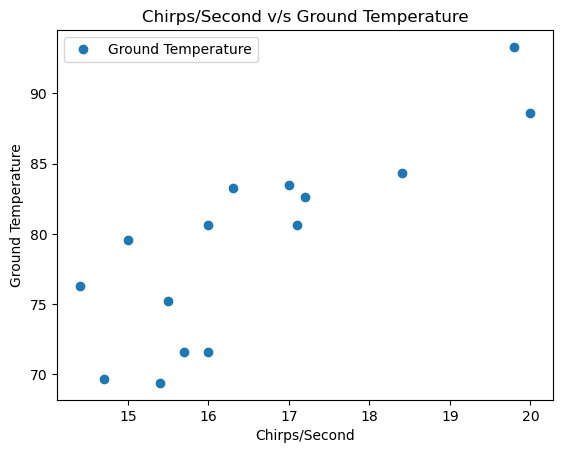

In [15]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second v/s Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [ ]:
#from the diagram we have a slightly linear relationship.

CHECK FOR CORRELATION

In [16]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
# Between both data sets, we had good correlation coefficient with 0.832. So, we can apply linear regression here.
# Here we have no transformation required.

POSSIBILITIES FOR DATA SPLIT EXIST OR NOT

In [17]:
df["Chirps/Second"].values

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [18]:
print(df.shape)
print(df.size)

(15, 2)
30


In [ ]:
#Here the size of row is 15. So splitting is not fit for the given data set.

Fitting of the linear model

Prediction model for Ground Temperature

In [19]:
x = df["Chirps/Second"].to_frame()
y = df["Ground Temperature"]

In [20]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) 
x = scaler.transform(x)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(x, y) 

LinearRegression()

In [22]:
print(regressor.intercept_)
print(regressor.coef_) 
print(regressor.predict([[15]]))

79.34666666666665
[5.64325739]
[163.99552758]


Text(0, 0.5, 'Ground Temperature')

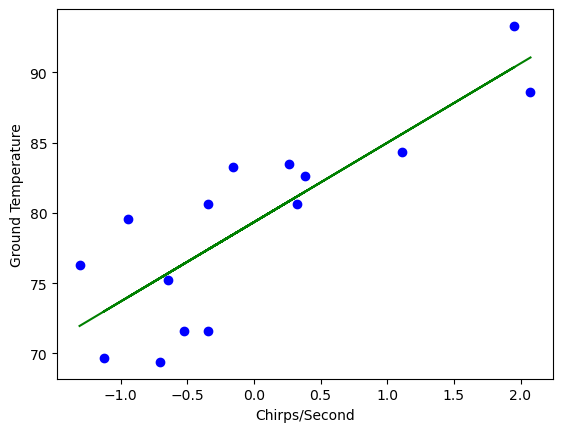

In [23]:
plt.scatter(x, y, color='blue')
plt.plot(x, regressor.predict(x), color='green')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')

In [24]:
y_pred = regressor.predict(x) 
"Syntax : varName.predict(test_features)"
pd.DataFrame(y_pred)

,0
0,91.055442
1,77.414150
2,90.373378
3,85.598925
4,81.165506
5,75.708989
6,72.980730
7,76.391053
8,75.367957
9,78.437247


In [25]:
df1 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1

,Actual,Predicted
0,88.6,91.055442
1,71.6,77.414150
2,93.3,90.373378
3,84.3,85.598925
4,80.6,81.165506
5,75.2,75.708989
6,69.7,72.980730
7,71.6,76.391053
8,69.4,75.367957
9,83.3,78.437247


Metric-R2-Score apply to given model

In [26]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6922946529147003


Prediction model for Chirps/Second of ground Cricket

In [27]:
x = df["Ground Temperature"].to_frame()
y = df["Chirps/Second"]

In [28]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) 
x = scaler.transform(x)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(x, y) 

LinearRegression()

In [30]:
print(regressor.intercept_)
print(regressor.coef_) 
print(regressor.predict([[80]]))

16.566666666666663
[1.37682846]
[126.71294331]


Text(0.5, 0, 'Ground Temperature')

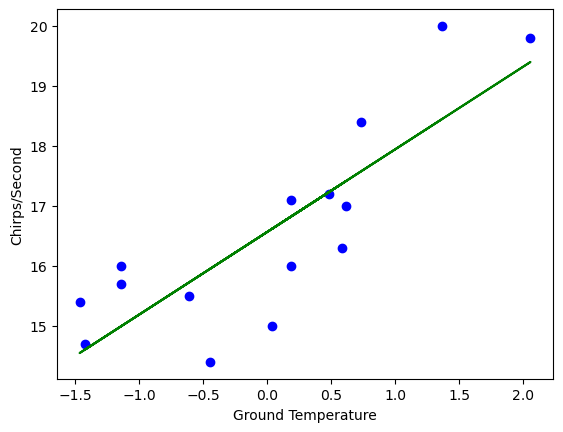

In [31]:
plt.scatter(x, y, color='blue')
plt.plot(x, regressor.predict(x), color='green')
plt.ylabel('Chirps/Second')
plt.xlabel('Ground Temperature')

In [32]:
y_pred = regressor.predict(x) 
"Syntax : varName.predict(test_features)"
pd.DataFrame(y_pred)

,0
0,18.445091
1,14.994095
2,19.399190
3,17.572192
4,16.821093
5,15.724894
6,14.608396
7,14.994095
8,14.547496
9,17.369192


In [33]:
df2 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df2

,Actual,Predicted
0,20.0,18.445091
1,16.0,14.994095
2,19.8,19.399190
3,18.4,17.572192
4,17.1,16.821093
5,15.5,15.724894
6,14.7,14.608396
7,15.7,14.994095
8,15.4,14.547496
9,16.3,17.369192


Metric-R2-Score apply to given model

In [34]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6922946529147


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [36]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [38]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [40]:
df.shape

(62, 2)

In [41]:
x = df.describe().T
x

,count,mean,std,min,25%,50%,75%,max
Brain,62.0,198.789984,899.158011,0.005,0.60,3.3425,48.2025,6654.0
Body,62.0,283.134194,930.278942,0.140,4.25,17.2500,166.0000,5712.0


CHECK THE PRESENCE OF OUTLIERS

In [44]:
def outlierpresence(df):
  for i in df.keys():
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    x = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
    # df[x.isin([True])]
    substring = 'True'
    y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)] #IT WILL GIVE ALL OUTLIERS IN THE DATAFRAME WITH ALL COLUMNS
    if True in y[i].tolist(): #HERE WE CHECK True is in the list of particular column
      print('Outliers', '\033[1m'+ 'present' +'\033[0m', 'in the data of','\033[1m' + i + '\033[0m')
      print('-------------------------------')
    else:
      print('Outliers', '\033[1m'+ ' not present in the data of' +'\033[0m', 'in','\033[1m' + i + '\033[0m') 
      print('-------------------------------') 
outlierpresence(df)

Outliers present in the data of Brain
-------------------------------
Outliers present in the data of Body
-------------------------------


In [ ]:
#Outliers present in the datas of 'Brain' and 'Body' columns. 

Print Lower and Upper Whiskers

In [46]:
def loweruppwhisker(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    print('\033[1m' + i + '\033[0m')
    print('-------------------------')
    print("Lowe whisker: ",lower_whisker)
    print("Upper whisker: ", upper_whisker)
    print("********************************")
loweruppwhisker(df)

Brain
-------------------------
Lowe whisker:  -70.80375000000001
Upper whisker:  119.60625
********************************
Body
-------------------------
Lowe whisker:  -238.375
Upper whisker:  408.625
********************************


OUTLIER VALUES OVER THE DATASET

In [47]:
def outliervalues(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    x = ((df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR))
    x = pd.DataFrame(x) # convert to data frame
    # df[x.isin([True])]
    substring = 'True'
    y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
    if True in y[i].tolist(): 
      print('\033[1m' + i + '\033[0m')
      print('-------------------------')
      # print(y[i]) 
      index = y.index
      print(df[i].iloc[index])
      print("Total number of Outlers in",i,"is: ",len(index))
      print("***********************************")
outliervalues(df)

Brain
-------------------------
3      465.0
18    2547.0
20     187.1
21     521.0
27     529.0
28     207.0
32    6654.0
41     250.0
55     192.0
57     160.0
Name: Brain, dtype: float64
Total number of Outlers in Brain is:  10
***********************************
Body
-------------------------
3      423.0
18    4603.0
20     419.0
21     655.0
27     680.0
31    1320.0
32    5712.0
41     490.0
45     440.0
Name: Body, dtype: float64
Total number of Outlers in Body is:  9
***********************************


In [ ]:
# Here we have total number of outliers in 'Brain' and 'Body' are 10 and 9 respectively. So, we can solve these outliers. 

EDA - Box plots in each case

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Brain'>

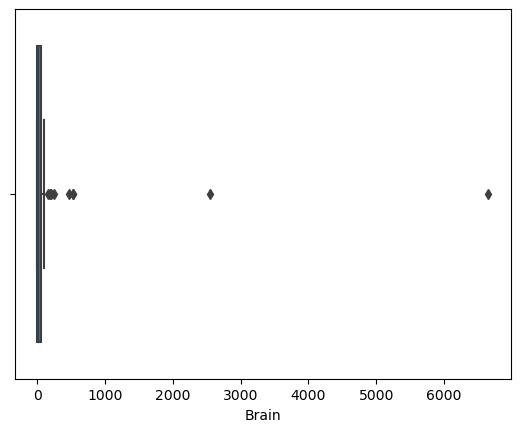

In [48]:
import seaborn as sns
sns.boxplot(df["Brain"])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Body'>

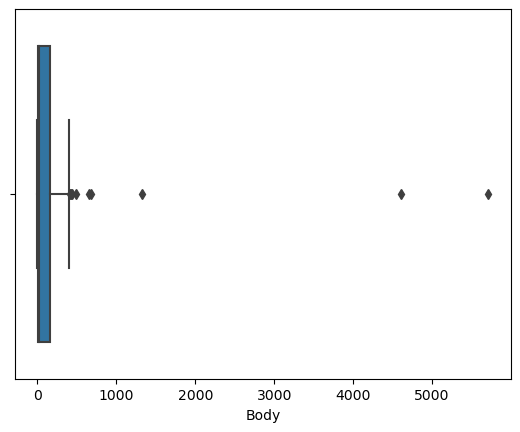

In [49]:
sns.boxplot(df["Body"])

In [52]:
def floorcapping(df):
  i = input()
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  x = ((df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR))
  x = pd.DataFrame(x) # convert to data frame
  # df[x.isin([True])]
  substring = 'True'
  y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
  if True in y[i].tolist():
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i])) 
  # substitute upper and lower whiskes to outliers
floorcapping(df)

Body


In [53]:
outlierpresence(df)

Outliers present in the data of Brain
-------------------------------
Outliers  not present in the data of in Body
-------------------------------


In [54]:
floorcapping(df)

Brain


In [55]:
outlierpresence(df)

Outliers  not present in the data of in Brain
-------------------------------
Outliers  not present in the data of in Body
-------------------------------


In [56]:
df.shape

(62, 2)

In [ ]:
# Here we have no changes in the shape of data. Since we substitute upper and lower whiskes to outliers.

EDA AFTER OUTLIER TRATMENT

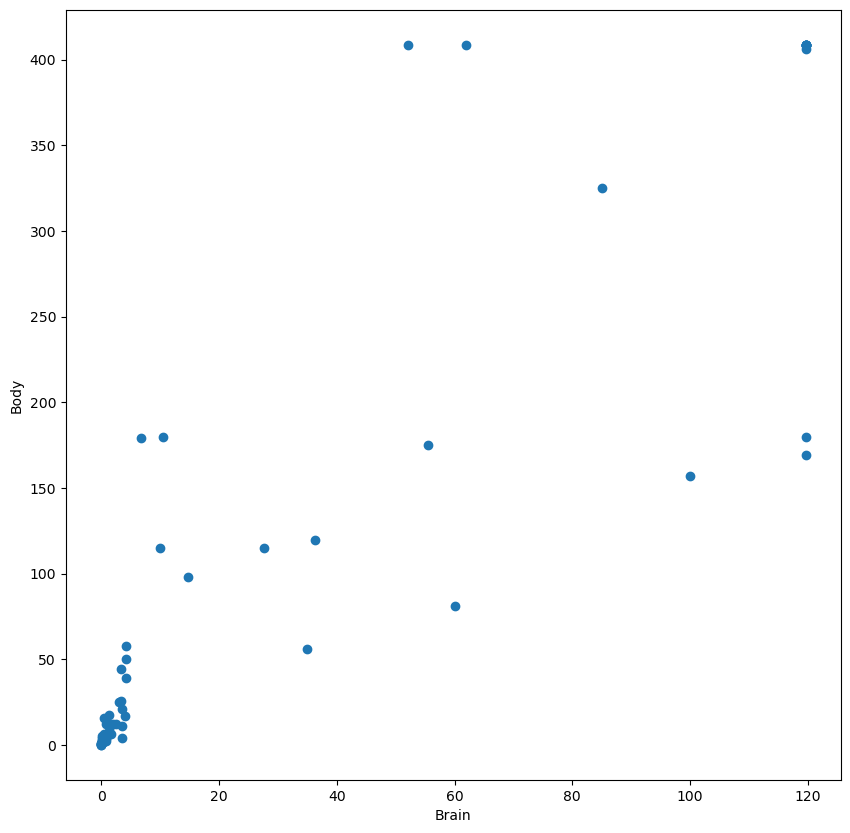

In [57]:
# Scatter plot
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df["Brain"], df["Body"])
# x-axis label
ax.set_xlabel('Brain')
# y-axis label
ax.set_ylabel('Body')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Body'>

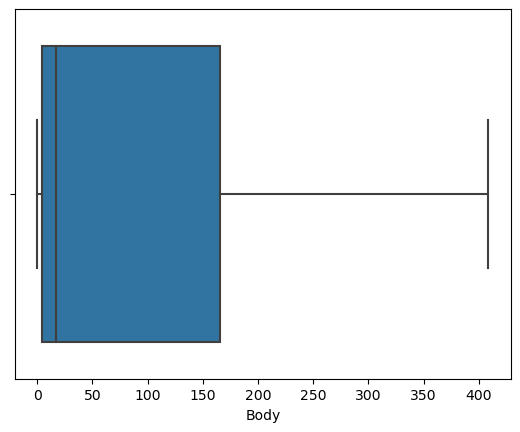

In [58]:
sns.boxplot(df["Body"])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Brain'>

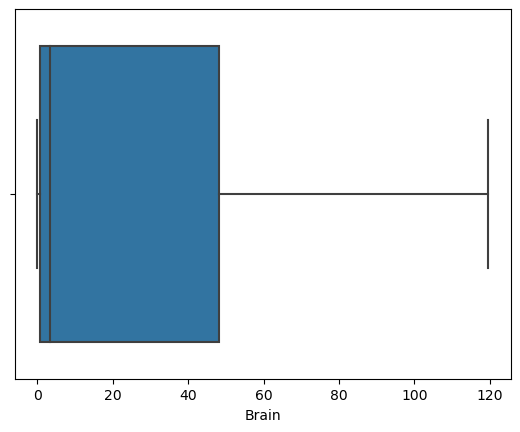

In [59]:
sns.boxplot(df["Brain"])

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [61]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [64]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [65]:
df.shape

(52, 6)

In [67]:
x = df.describe().T
x

,count,mean,std,min,25%,50%,75%,max
Sex,52.0,0.269231,0.447888,0.0,0.00,0.0,1.00,1.0
Rank,52.0,2.038462,0.862316,1.0,1.00,2.0,3.00,3.0
Year,52.0,7.480769,5.507536,0.0,3.00,7.0,11.00,25.0
Degree,52.0,0.653846,0.480384,0.0,0.00,1.0,1.00,1.0
YSdeg,52.0,16.115385,10.222340,1.0,6.75,15.5,23.25,35.0
Salary,52.0,23797.653846,5917.289154,15000.0,18246.75,23719.0,27258.50,38045.0


CHECK THE PRESENCE OF OUTLIERS

In [68]:
def outlierpresence(df):
  for i in df.keys():
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    x = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
    # df[x.isin([True])]
    substring = 'True'
    y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)] #IT WILL GIVE ALL OUTLIERS IN THE DATAFRAME WITH ALL COLUMNS
    if True in y[i].tolist(): #HERE WE CHECK True is in the list of particular column
      print('Outliers', '\033[1m'+ 'present' +'\033[0m', 'in the data of','\033[1m' + i + '\033[0m')
      print('-------------------------------')
    else:
      print('Outliers', '\033[1m'+ ' not present in the data of' +'\033[0m', 'in','\033[1m' + i + '\033[0m') 
      print('-------------------------------') 
outlierpresence(df)

Outliers  not present in the data of in Sex
-------------------------------
Outliers  not present in the data of in Rank
-------------------------------
Outliers present in the data of Year
-------------------------------
Outliers  not present in the data of in Degree
-------------------------------
Outliers  not present in the data of in YSdeg
-------------------------------
Outliers  not present in the data of in Salary
-------------------------------


Print Lower and Upper Whiskers

In [69]:
def loweruppwhisker(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    print('\033[1m' + i + '\033[0m')
    print('-------------------------')
    print("Lowe whisker: ",lower_whisker)
    print("Upper whisker: ", upper_whisker)
    print("************************")
loweruppwhisker(df)

Sex
-------------------------
Lowe whisker:  -1.5
Upper whisker:  2.5
************************
Rank
-------------------------
Lowe whisker:  -2.0
Upper whisker:  6.0
************************
Year
-------------------------
Lowe whisker:  -9.0
Upper whisker:  23.0
************************
Degree
-------------------------
Lowe whisker:  -1.5
Upper whisker:  2.5
************************
YSdeg
-------------------------
Lowe whisker:  -18.0
Upper whisker:  48.0
************************
Salary
-------------------------
Lowe whisker:  4729.125
Upper whisker:  40776.125
************************


OUTLIER VALUES OVER THE DATASET

In [70]:
def outliervalues(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    x = ((df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR))
    x = pd.DataFrame(x) # convert to data frame
    # df[x.isin([True])]
    substring = 'True'
    y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
    if True in y[i].tolist(): 
      print('\033[1m' + i + '\033[0m')
      print('-------------------------')
      # print(y[i]) 
      index = y.index
      print(df[i].iloc[index])
      print("Total number of Outlers in",i,"is: ",len(index))
      print("***********************")
outliervalues(df)

Year
-------------------------
0    25
Name: Year, dtype: int64
Total number of Outlers in Year is:  1
***********************


In [ ]:
# Here only one outlier in the year dataset. This is not affecting my dataset. But for the cleaning purpose we can do the outlier treatment.

In [ ]:
###**Floor and Capping method to outlier datas**

In [71]:
def floorcapping(df):
  i = input()
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  x = ((df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR))
  x = pd.DataFrame(x) # convert to data frame
  # df[x.isin([True])]
  substring = 'True'
  y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
  if True in y[i].tolist():
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i])) 
  # substitute upper and lower whiskes to outliers
floorcapping(df)

Year


In [72]:
outlierpresence(df)

Outliers  not present in the data of in Sex
-------------------------------
Outliers  not present in the data of in Rank
-------------------------------
Outliers  not present in the data of in Year
-------------------------------
Outliers  not present in the data of in Degree
-------------------------------
Outliers  not present in the data of in YSdeg
-------------------------------
Outliers  not present in the data of in Salary
-------------------------------


In [73]:
df.head(1)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,23.0,1,35,36350


CHECK FOR DUPLICATES

In [74]:
df = df.drop_duplicates()

In [75]:
df.shape

(52, 6)

In [ ]:
#there is no duplicates

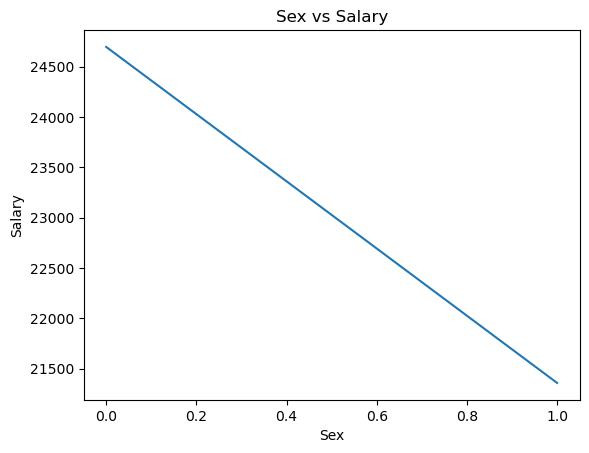

In [76]:
df.groupby('Sex')['Salary'].mean().plot()
#df.plot(x='', y='Petrol_Consumption', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [79]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


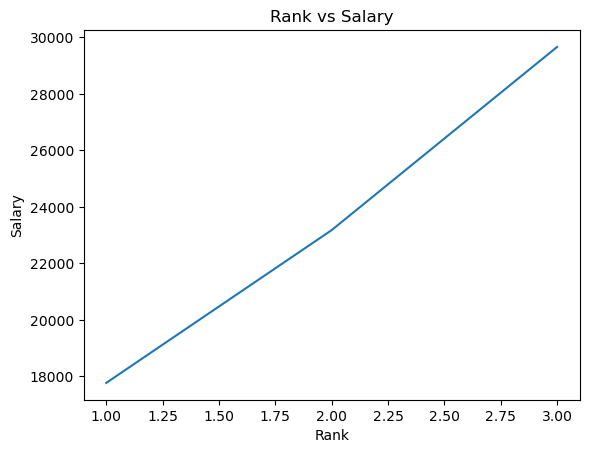

In [80]:
df.groupby('Rank')['Salary'].mean().plot()
#df.plot(x='', y='Petrol_Consumption', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [81]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


Rank has more influence over salary. There is a good linear relation between Rank and Salary

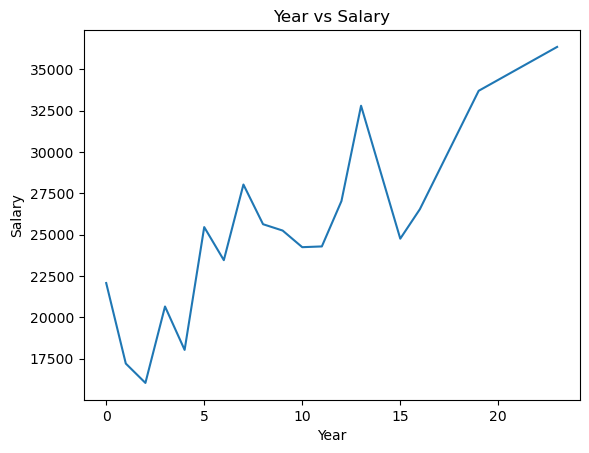

In [82]:
df.groupby('Year')['Salary'].mean().plot()
#df.plot(x='', y='Petrol_Consumption', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [83]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700711
Salary,0.700711,1.000000


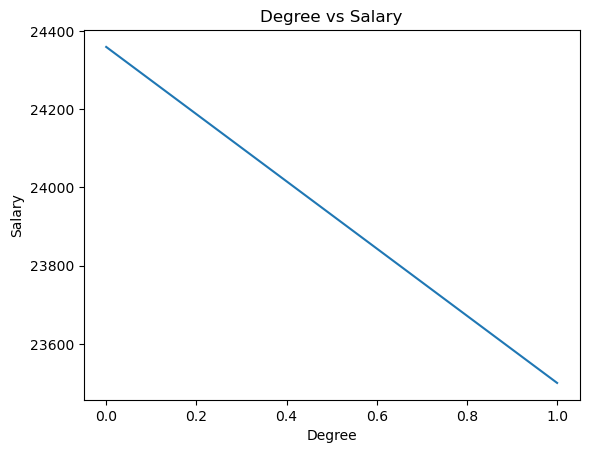

In [84]:
df.groupby('Degree')['Salary'].mean().plot()
#df.plot(x='', y='Petrol_Consumption', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [85]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


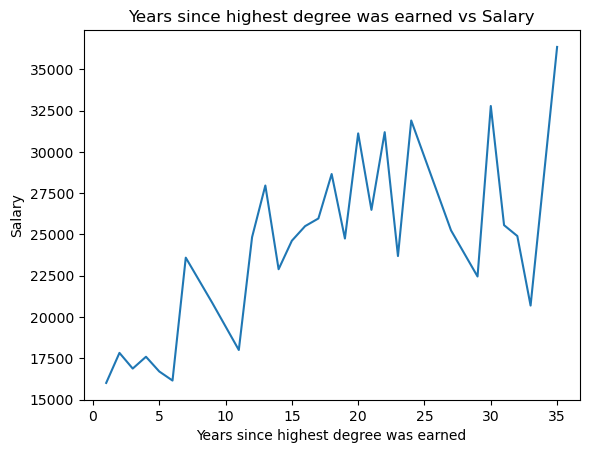

In [86]:
# YSdeg
df.groupby('YSdeg')['Salary'].mean().plot()
#df.plot(x='', y='Petrol_Consumption', style='o')
plt.title('Years since highest degree was earned vs Salary')
plt.xlabel('Years since highest degree was earned')
plt.ylabel('Salary')
plt.show()

In [87]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [88]:
X = df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values #array of features
y = df['Salary'].values

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

MODEL TRAINING

In [91]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [92]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,463.698987
Rank,4604.131654
Year,2391.008498
Degree,195.876325
YSdeg,-400.371906


In [93]:
regressor.coef_

array([ 463.69898704, 4604.13165448, 2391.00849814,  195.87632514,
       -400.37190628])

In [94]:
regressor.intercept_ # c 

23655.90243902439

In [95]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,26182,21263.906323
1,17095,16931.906110
2,24750,26578.916243
3,22450,22779.878765
4,28200,29509.262157
5,21600,19785.909240
6,18075,16485.820321
7,23713,18358.937802
8,24800,24985.804178
9,33696,32835.375656


In [96]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6477828206735223
